# **Problem Description:**


Task Title:
Real-Time Traffic Accident Severity Prediction System

Task Description:
Develop a real-time Machine Learning system that predicts the severity level of road accidents based on environmental, traffic, and weather data.

Requirements:

Use a public dataset containing factors such as weather, time of day, traffic volume, and road type.

**Dataset description:                   <br>**
Link: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents<br>
Total samples: 7.7 millions<br>
Total attributes: 46<br>

#**Core imports**

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import warnings


# ML imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                            accuracy_score, precision_recall_fscore_support,
                            roc_auc_score, roc_curve)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import joblib



**Ignore warnings**

In [2]:
#Ignore warning
warnings.filterwarnings('ignore')

#**Load sample data for inspection and feature selection.**

Load the sample dataset


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Read sample data from the dataset stored in Google drive
df_sample = pd.read_csv('/content/drive/MyDrive/dataset/US_Accidents_March23.csv', nrows=10000)

#Display the shate of the dataset
df_sample.shape

(10000, 46)

In [7]:
#Show head of the dataset
df_sample.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
#Show dataset information
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10000 non-null  object 
 1   Source                 10000 non-null  object 
 2   Severity               10000 non-null  int64  
 3   Start_Time             10000 non-null  object 
 4   End_Time               10000 non-null  object 
 5   Start_Lat              10000 non-null  float64
 6   Start_Lng              10000 non-null  float64
 7   End_Lat                0 non-null      float64
 8   End_Lng                0 non-null      float64
 9   Distance(mi)           10000 non-null  float64
 10  Description            10000 non-null  object 
 11  Street                 10000 non-null  object 
 12  City                   10000 non-null  object 
 13  County                 10000 non-null  object 
 14  State                  10000 non-null  object 
 15  Zip

No of unique values in each column

In [9]:
#Display number of unique values
df_sample.nunique().sort_values(ascending=False)

,0
ID,10000
End_Time,9921
Start_Time,9907
Description,8528
Start_Lat,6372
Start_Lng,6277
Weather_Timestamp,5712
Street,2299
Zipcode,2265
City,408


In [10]:
#Describe the sample dataset
df_sample.describe(include='all')

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,10000,10000,10000.00000,10000,10000,10000.000000,10000.000000,0.0,0.0,10000.000000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,2,NaN,9907,9921,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,1,2,2,2,2
top,A-9984,Source2,NaN,2016-06-26 08:16:07,2016-07-16 16:50:00,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,9981,NaN,13,13,NaN,NaN,NaN,NaN,NaN,...,9998,9849,9562,9988,8905,10000,6031,6423,6741,7159
mean,NaN,NaN,2.39470,NaN,NaN,38.128680,-119.041084,NaN,NaN,0.021386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.49126,NaN,NaN,0.749559,9.963780,NaN,NaN,0.397797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.00000,NaN,NaN,36.352592,-123.810753,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.00000,NaN,NaN,37.643864,-122.159031,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.00000,NaN,NaN,37.959778,-121.875954,NaN,NaN,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.00000,NaN,NaN,38.574538,-121.349976,NaN,NaN,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Feature Selection**

Selected Features which are important and impact the prediction

In [11]:
#Create a list of selected features after manual verification
selected_features = ['Severity',
    'Start_Time',
    'End_Time',
    'Weather_Timestamp',
    'Start_Lat',
    'Start_Lng',
    'Distance(mi)',
    'Temperature(F)',
    'Wind_Chill(F)',
    'Humidity(%)',
    'Pressure(in)',
    'Visibility(mi)',
    'Wind_Speed(mph)',
    'Precipitation(in)',
    'Wind_Direction',
    'Weather_Condition',
    'Sunrise_Sunset',
    'Civil_Twilight',
    'Nautical_Twilight',
    'Astronomical_Twilight',
    'Amenity',
    'Bump',
    'Crossing',
    'Give_Way',
    'Junction',
    'No_Exit',
    'Railway',
    'Roundabout',
    'Station',
    'Stop',
    'Traffic_Calming',
    'Traffic_Signal',
    'Source',
    'State',
    'Timezone'
]

# **Loading the whole dataset with 35 selected features**

In [12]:
#Create a dataframe with selected features and all samples
df_selected_features = pd.read_csv('/content/drive/MyDrive/dataset/US_Accidents_March23.csv', usecols=selected_features)


In [13]:
#Shape of the dataset
df_selected_features.shape

(7728394, 35)

In [14]:
#Display head of the dataset
df_selected_features.head()

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),State,Timezone,Weather_Timestamp,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,OH,US/Eastern,2016-02-08 05:58:00,...,False,False,False,False,False,False,Night,Night,Night,Night
1,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,OH,US/Eastern,2016-02-08 05:51:00,...,False,False,False,False,False,False,Night,Night,Night,Day
2,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,OH,US/Eastern,2016-02-08 06:56:00,...,False,False,False,False,False,True,Night,Night,Day,Day
3,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,OH,US/Eastern,2016-02-08 07:38:00,...,False,False,False,False,False,False,Night,Day,Day,Day
4,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,OH,US/Eastern,2016-02-08 07:53:00,...,False,False,False,False,False,True,Day,Day,Day,Day


# **Data Preprocessing**

Conversion of Timestamp columns to datetime

In [15]:
#Convert timestamp columns to datetime --- Strt_Time, End_Time, and Weather_Timestamp
df_selected_features['Start_Time'] = pd.to_datetime(df_selected_features['Start_Time'], errors='coerce')
df_selected_features['End_Time'] = pd.to_datetime(df_selected_features['End_Time'], errors='coerce')
df_selected_features['Weather_Timestamp'] = pd.to_datetime(df_selected_features['Weather_Timestamp'], errors='coerce')


Calculate Time in Minutes by using End_Time and Start_Time and add to column to the dataset.

In [16]:
#Calculating journey time
df_selected_features['Duration_in_minutes'] = (df_selected_features['End_Time'] - df_selected_features['Start_Time']).dt.total_seconds() / 60

Extract features from columns having datetime objects

In [17]:
#Extract features from Start_Time
df_selected_features['Start_Hour'] = df_selected_features['Start_Time'].dt.hour
df_selected_features['Start_Weekday'] = df_selected_features['Start_Time'].dt.dayofweek
df_selected_features['Start_Month'] = df_selected_features['Start_Time'].dt.month
df_selected_features['Start_Year'] = df_selected_features['Start_Time'].dt.year

#Extract features from Weather_Timestamp
df_selected_features['Weather_Hour'] = df_selected_features['Weather_Timestamp'].dt.hour
df_selected_features['Weather_Weekday'] = df_selected_features['Weather_Timestamp'].dt.dayofweek

Remove the datetime columns

In [18]:
#Drop datetime columns after extraction of required features
datetime_columns = ['Start_Time', 'End_Time', 'Weather_Timestamp']
df_selected_features= df_selected_features.drop(datetime_columns, axis=1)

# **Fill missing values**

Finding the features with null values.

In [19]:
#Display features with null values
df_selected_features.isnull().sum()

,0
Source,0
Severity,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
State,0
Timezone,7808
Temperature(F),163853
Wind_Chill(F),1999019
Humidity(%),174144


Verifying the data types of the features.

In [20]:
#Knowing the datatypes of the features
df_selected_features.dtypes

,0
Source,object
Severity,int64
Start_Lat,float64
Start_Lng,float64
Distance(mi),float64
State,object
Timezone,object
Temperature(F),float64
Wind_Chill(F),float64
Humidity(%),float64


Filling numerical columns with median value.

In [21]:
#Filling missing values of numerical variables with median value
for cols in df_selected_features.select_dtypes(include=['float64','int64']).columns:
    df_selected_features[cols].fillna(df_selected_features[cols].median(), inplace=True)

Filling Object columns with mode value.

In [22]:
#Filling missing values of the object type variables with mode value
for cols in df_selected_features.select_dtypes(include=['object']).columns:
    df_selected_features[cols].fillna(df_selected_features[cols].mode()[0], inplace=True)

Number of unique values in each categorical column.


In [23]:
df_selected_features.select_dtypes(include=['object']).nunique().sort_values(ascending=False)

,0
Weather_Condition,144
State,49
Wind_Direction,24
Timezone,4
Source,3
Sunrise_Sunset,2
Civil_Twilight,2
Nautical_Twilight,2
Astronomical_Twilight,2


Label Encoding of Categorical Variables

In [24]:
#Encoding of categorical variables using label encoder
for col in df_selected_features.select_dtypes(include='object').columns:
    if len(df_selected_features[col].unique()) > 1:
        le = LabelEncoder()
        df_selected_features[col] = le.fit_transform(df_selected_features[col])

In [25]:
#Display shape of the dataset after encoding
df_selected_features.shape

(7728394, 39)

In [26]:
#Displaying head of the dataset after encoding
df_selected_features.head()

,Source,Severity,Start_Lat,Start_Lng,Distance(mi),State,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration_in_minutes,Start_Hour,Start_Weekday,Start_Month,Start_Year,Weather_Hour,Weather_Weekday
0,1,3,39.865147,-84.058723,0.01,33,1,36.9,62.0,91.0,...,1,1,1,314.0,5.0,0.0,2.0,2016.0,5.0,0.0
1,1,2,39.928059,-82.831184,0.01,33,1,37.9,62.0,100.0,...,1,1,0,30.0,6.0,0.0,2.0,2016.0,5.0,0.0
2,1,2,39.063148,-84.032608,0.01,33,1,36.0,33.3,100.0,...,1,0,0,30.0,6.0,0.0,2.0,2016.0,6.0,0.0
3,1,3,39.747753,-84.205582,0.01,33,1,35.1,31.0,96.0,...,0,0,0,30.0,7.0,0.0,2.0,2016.0,7.0,0.0
4,1,2,39.627781,-84.188354,0.01,33,1,36.0,33.3,89.0,...,0,0,0,30.0,7.0,0.0,2.0,2016.0,7.0,0.0


In [27]:
#Display information after encoding
df_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 39 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 int64  
 1   Severity               int64  
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Distance(mi)           float64
 5   State                  int64  
 6   Timezone               int64  
 7   Temperature(F)         float64
 8   Wind_Chill(F)          float64
 9   Humidity(%)            float64
 10  Pressure(in)           float64
 11  Visibility(mi)         float64
 12  Wind_Direction         int64  
 13  Wind_Speed(mph)        float64
 14  Precipitation(in)      float64
 15  Weather_Condition      int64  
 16  Amenity                bool   
 17  Bump                   bool   
 18  Crossing               bool   
 19  Give_Way               bool   
 20  Junction               bool   
 21  No_Exit                bool   
 22  Railway           

# **Model Building**

Creating a sample dataset with 10% data of the dataset **df_selected_features** that is having the seven million rows with selected features.

Constant Declaration

In [28]:
#Declare required constants
SAMPLE_SIZE = 0.1
RANDOM_STATE = 42

In [29]:
#Create a sample dataset with 10% samples of the original dataset with selected features
df_sampled = df_selected_features.sample(frac=SAMPLE_SIZE, random_state=RANDOM_STATE)

Separation of input and target features.

In [30]:
# Separate the input features and target feature
X_sample = df_sampled.drop('Severity', axis=1)
y_sample = df_sampled['Severity']

Train and Test Split

In [31]:
#Splitting the sample dataset with 80:20 train-test split ratio
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)


In [32]:
#Shape of the train, test splits
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (618271, 38)
Testing features shape: (154568, 38)
Training target shape: (618271,)
Testing target shape: (154568,)


# **Random Forest Model**

In [33]:
#Create a multiclass classifier using random forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)


Training the model

In [34]:
#Training the classifier
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

Evaluation of Model Performance

In [35]:
#Model prediction
y_pred = rf_model.predict(X_test)
print("Predictions made on the test set.")

#Probability calculation
y_pred_proba = rf_model.predict_proba(X_test)
print("Class probabilities predicted on the test set.")

#Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

#Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Display confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Predictions made on the test set.
Class probabilities predicted on the test set.

Accuracy Score: 0.8640

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.54      0.63      1361
           2       0.89      0.95      0.92    123050
           3       0.71      0.57      0.64     26051
           4       0.63      0.17      0.27      4106

    accuracy                           0.86    154568
   macro avg       0.74      0.56      0.61    154568
weighted avg       0.85      0.86      0.85    154568


Confusion Matrix:
[[   741    542     78      0]
 [   171 117156   5466    257]
 [    75  10873  14951    152]
 [     9   2963    437    697]]


save the random forest model in colab

In [36]:
import joblib

joblib.dump(rf_model, "random_forest_model.pkl")

['random_forest_model.pkl']

Download the random forest model in our local system

In [37]:
from google.colab import files

files.download("random_forest_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Feature Importance

In [41]:
feature_importances = rf_model.feature_importances_
print("Feature Importances extracted successfully.")

Feature Importances extracted successfully.


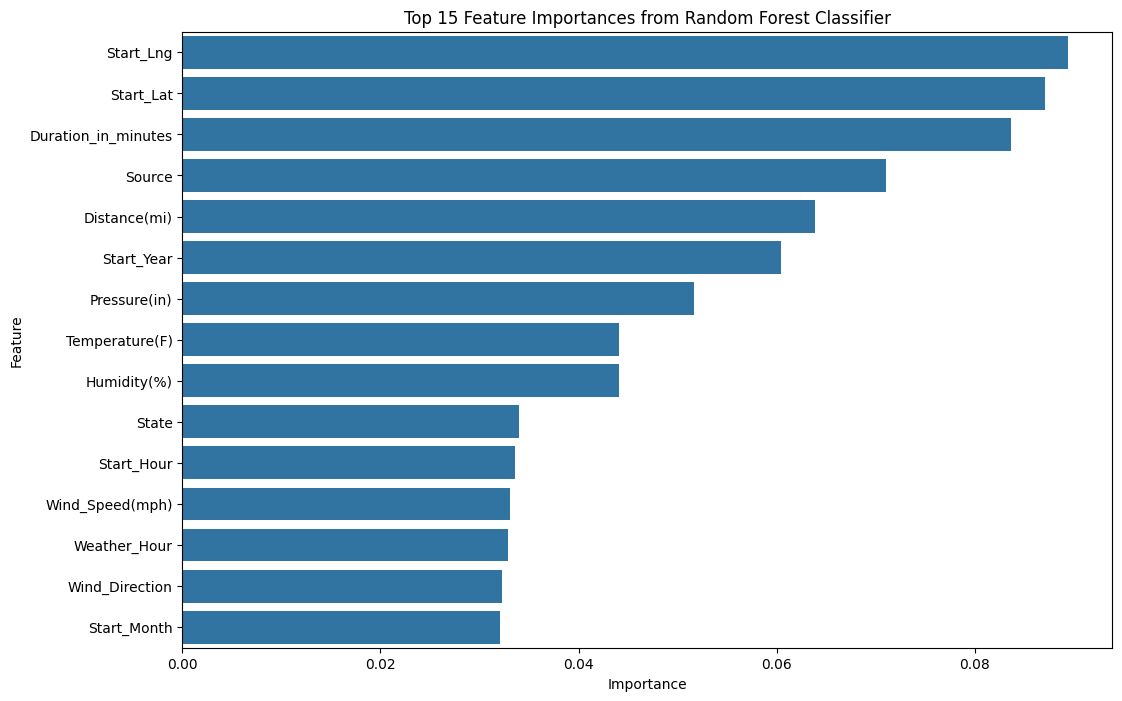

Bar plot of top 15 feature importances displayed successfully.


In [43]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_df.head(15))
plt.title('Top 15 Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
print("Bar plot of top 15 feature importances displayed successfully.")